

[{'enters': 2, 'idea': 2, 'wild': 1, 'party': 1, 'thief': 2, 'their': 2, 'just': 2, 'embark': 1, 'another': 1, 'an': 2, 'to': 2, 'steal': 2, 'friends': 1, 'someone': 2, 'example': 1, 'lose': 1, 'attempt': 1, 'dreams': 2, 'a': 4, 'people': 2, 'in': 2, 'mind': 2, 's': 3, 'sample': 3, 'tasked': 2, 'is': 4, 'with': 2, 'two': 1, 'on': 1, 'who': 2, 'high': 1, 'night': 1, 'secrets': 2, 'school': 1, 'this': 3, 'text': 2, 'virginity': 1, 'planting': 2}, {'enters': 1, 'idea': 1, 'wild': 2, 'party': 2, 'thief': 1, 'their': 2, 'just': 2, 'embark': 2, 'another': 3, 'an': 2, 'to': 2, 'steal': 1, 'friends': 2, 'someone': 1, 'example': 2, 'lose': 2, 'attempt': 2, 'dreams': 1, 'a': 2, 'people': 1, 'in': 2, 'mind': 1, 's': 1, 'sample': 2, 'tasked': 1, 'is': 1, 'with': 1, 'two': 2, 'on': 2, 'who': 1, 'high': 2, 'night': 2, 'secrets': 1, 'school': 2, 'this': 1, 'text': 1, 'virginity': 2, 'planting': 1}]
[{'enters': 2, 'idea': 2, 'wild': 1, 'party': 1, 'thief': 2, 'their': 2, 'just': 2, 'embark': 1, 'ano

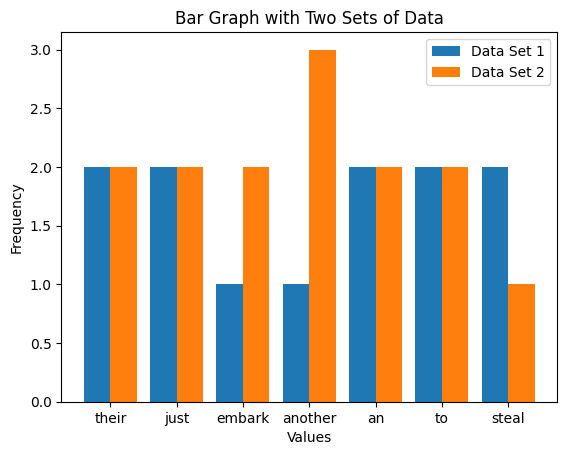

In [11]:
class Multinomial:
    def __init__(self):
        self.keywords = {}

    def __str__(self):
        pass

    def word_freq(self, text):
        words = text.lower().split()
        unique_words = set(words)
        frequency_dict = {}

        for word in unique_words:
            frequency_dict[word] = words.count(word) + 1

        return frequency_dict

    def initialise(self, dataset, target):
        self.keywords = {}
        for c in set(dataset[target]):
            self.keywords[c] = ['']

        # loop through the keys/columns in the dataset
        for i, col in enumerate(dataset.keys):
            # check if the column is a discrete feature
            if 'discrete feature' in dataset['types'][i] and col != target:
                for j, entry in enumerate(dataset[col]):  # loop through the entries in the column
                    filtered = entry
                    for char in ["?", ".", ",", "-", ";", ":"]:
                        filtered = filtered.replace(char, ' ')
                    filtered = ' ' + filtered
                    self.keywords[dataset[target][j]][0] += filtered

                # make dictionary with self.keywords set as keys and their freqs as values. then increment values dep on freq of each word in all values
                # values need to be array of 2 values, one for each class, ie freq in each class

    def fit(self, dataset, target):
        self.initialise(dataset, target)

# def word_frequency(text):
#     chars = [c for c in list(text.lower()) if c.isalpha() or c == ' ']
#     words = ''.join(chars).split()
#     print(words)
#     unique_words = set(words)
#     frequency_dict = {word : words.count(word) for word in unique_words}

#     for word in unique_words:
#         frequency_dict[word] = words.count(word)

#     return frequency_dict

def clean_prose(prose, caps=False):
    if not caps:
        chars = [c if (c.isalpha() or ' ' in c) else ' ' for c in list(prose.lower())]
    else:
        chars = [c  if (c.isalpha() or ' ' in c) else ' ' for c in list(prose)]
    text = ''.join(chars)
    return text

def word_frequency_in_string(word_set, text, offset=0):
    cleaned_text = clean_prose(text)
    # print(cleaned_text) # Debugging
    frequency_dict = {}

    for word in word_set:
        frequency_dict[word] = cleaned_text.lower().split().count(word.lower()) + offset

    return frequency_dict

def freqs_in_classes(classes):
    '''
    [' '.join(cl) for cl in classes] : List comprehension concatenating all the entries with the same class into
    each element of the list.

    ' '.join([' '.join(cl) for cl in classes]) : Concatenating the previously mentioned list into one single string with
    a ' ' separator so that the unique words can later be extracted.
    '''
    combined_text = clean_prose(' '.join([' '.join(cl) for cl in classes]))
    # print(combined_text) # Debugging
    unique = set(combined_text.split())
    freq_results = []
    for cl in classes:
        freq_results.append(word_frequency_in_string(unique, ' '.join(cl), offset=1))

    print('\n')
    print(freq_results)

    return freq_results

# Example Usage:
list1 = ["This is a sample text.",
         "This is just a sample.",
         "A thief who enters people's dreams to steal their secrets is tasked with planting an idea in someone's mind."]
list2 = ["Another sample.",
         "Just another example.",
         "Two high school friends embark on a wild party night in an attempt to lose their virginity."]
result = freqs_in_classes([list1, list2])
print(result)

import matplotlib.pyplot as plt

def plot_bar_graph(dict1, dict2):
    labels = list(dict1.keys())  # Example labels
    x = range(len(labels))  # Generate x values for the bars

    # Plotting the bars
    try:
      plt.bar([i - 0.2 for i in x], list(dict1.values()), width=0.4, label='Data Set 1')
      plt.bar([i + 0.2 for i in x], list(dict2.values()), width=0.4, label='Data Set 2')
    except TypeError:
      plt.bar([i - 0.2 for i in x], dict1, width=0.4, label='Data Set 1')
      plt.bar([i + 0.2 for i in x], dict2, width=0.4, label='Data Set 2')

    # Adding labels, title, and legend
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Bar Graph with Two Sets of Data')
    plt.xticks(x, labels)
    plt.legend()

    # Show the plot
    plt.show()

# Example Usage:
# data1 = [10, 20, 30, 40, 50]
# data2 = [15, 25, 35, 45, 55]

d1 = {key:value for key, value in list(result[0].items())[5:12]}
d2 = {key:value for key, value in list(result[1].items())[5:12]}

plot_bar_graph(d1, d2)
